# Transforming images into csv

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import cv2
# Helper functions
from ocr.helpers import implt
from ocr.datahelpers import correspondingShuffle

In [4]:
# Get locations of images
imglist0 = glob.glob('data/gapdet/0/*.jpg')
imglist1 = glob.glob('data/gapdet/1/*.jpg')

# Load grayscale images
img0 = np.array([np.array(cv2.imread(img, 0)) for img in imglist0])
img1 = np.array([np.array(cv2.imread(img, 0)) for img in imglist1])

# Image dimensions are 30x60 = 1800
print("Char: " + str(len(img0)))
print("Gaps: " + str(len(img1)))
print("Total: " + str(len(img1) + len(img0)))

images = np.concatenate([img0.reshape(len(img0), 1800), img1.reshape(len(img1), 1800)])
labels = np.concatenate([np.zeros(len(img0)), np.ones(len(img1))])

# Shuffle data
images, labels = correspondingShuffle([images, labels])    

# Create CSV files
with open('data/gapdet/data.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for row in images:
        writer.writerow(row)
        
with open('data/gapdet/labels.csv', 'w') as csvfile:
    writer = csv.writer(csvfile, delimiter=',', quotechar='|', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(labels)
    
print("CSV data files saved.")

Char: 16158
Gaps: 6076
Total: 22234
CSV data files saved.


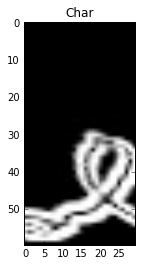

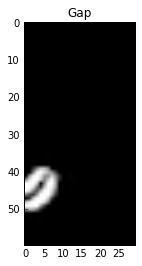

In [5]:
# Print two random images
for i in range(len(images)):
    if labels[i] == 0:
        implt(images[i].reshape(60,30), 'gray', 'Char')
        break;
        
for i in range(len(images)):
    if labels[i] == 1:
        implt(images[i].reshape(60,30), 'gray', 'Gap')
        break;